# Preface

This notebook aims to provide a brief introduction to a Monte Carlo Radiative Transfer (MCRT) simulation. This notebook deals with a radiative transfer problem for (semi-infinite) plane-parallel atmosphere using analytical and numerical methods. This notebook is based on Python3. As this notebook may not be written kindly, I recommend readers to refer to the following references if necessary.

For the theory of radiative transfer:   
- [Radiative processes in astrophysics (Rybicki and Lightman 1979)](https://ui.adsabs.harvard.edu/abs/1979rpa..book.....R) (in particular Chap. 1; Theory)  
- [Radiative transfer in astrophysics (Lecture notes by Kees Dullemond)](https://www.ita.uni-heidelberg.de/~dullemond/lectures/radtrans_2013/index.shtml) (Theory+Numerical Simulation)  
- [Radiative Transfer (Chandrasekhar 1960)](https://ui.adsabs.harvard.edu/abs/1960ratr.book.....C) (Theory, mainly dedicated to plane-parallel radiative transfer)  

For a Monte Carlo Radiative Transfer simulation:   
- [Monte Carlo Radiative Transfer (by Whitney 2011)](https://arxiv.org/abs/1104.4990)   
- [Introduction to Monte Carlo Radiation Transfer (by Wood et al. 2013)](http://www-star.st-and.ac.uk/~kw25/research/montecarlo/book.pdf)  

For a general introduction to Monte Carlo simulation:  
- [Exploring Monte Carlo Methods (Dunn & Shultis 2011)](https://www.amazon.com/Exploring-Monte-Carlo-Methods-William/dp/0444515755) 

# Radiation transfer equation 

The radiative transfer equation for the semi-infinite plane-parallel atmosphere is (e.g., Rybicki \& Lightman 1979)
$$
\mu\frac{\partial I_\nu}{\partial \tau}=I_\nu-S_\nu,\\  
S_\nu=\epsilon_\nu B_\nu+(1-\epsilon_\nu)J_\nu
$$
where $I_\nu$ is the intensity, $S_\nu$ is the source function, $B_\nu$ is the Planck function, $\epsilon_\nu$ is the photon destruction efficiency, and $J_\nu$ is the mean intensity. $\tau$ is the optical depth of the atmosphere *along the vertical direction* measured from top to bottom. $\mu$ is the cosine of the angle between the ray and the vertical direction. 
We have also assumed isotropic scattering. The mean intensity is defined by
$$
J_\nu=\frac{1}{4\pi}\oint I_\nu d\Omega
$$

A goal of a radiative transfer problem is to find $I_\nu$ by solving the above integrodifferential equation.

Hereafter, we restrict ourselves to consider a simple problem. First of all, we assume a gray atmosphere so that radiative processes are independent of frequency. We will consider monochromatic wave and omit the subscript $\nu$ in each quantity for notational convenience. Also, we assume a non-absorbing atmosphere ($\epsilon=0$) so that the source function becomes $S=J$. Under these assumptions, we will solve the radiative transfer problem.

Under the above assumptions, the *formal* solution to the radiative transfer equation is
$$
I(\tau,\mu)=I(\tau_0,\mu)e^{(\tau-\tau_0)/\mu}-\int_{\tau_0}^\tau S(t)e^{-(t-\tau)/\mu}\frac{dt}{\mu},
$$
where $I(\tau_0,\mu)$ is the intensity at $\tau=\tau_0$, which is usually known, e.g., from a boundary condition.
This solution is just a *formal solution* because we do not know a functional form of the source function $S(t)$. Once we somehow obtain the source function, then the radiative transfer problem will be immediately solved using this formal solution. In this sense, we may also say that a radiative transfer problem is to find the source function instead of saying to find the intensity.

# Analytical solutions

First of all, let's try to solve the radiative transfer problem by an analytical method.

## Milne-Eddington approximation

One of the famous approximate solutions is the so-called *Milne-Eddington approximation*, where the radiative transfer equations are solved using moment equations.
The radiation moments are defined by
$$
H=\frac{1}{4\pi}\oint \mu I d\Omega,~K=\frac{1}{4\pi}\oint \mu^2 I d\Omega
$$

From the radiative transfer equation, radiation moments obey
$$
\frac{dH}{d\tau}=J-S,\\
\frac{dK}{d\tau}=H,
$$
At this moment, there are three unknown quantities ($J,~H,~K$), while we have only two equations. Therefore, we need one more equation to solve them. To close the equations, we assume the following relation (a closure relation):
$$
K=\frac{1}{3}J.
$$
This closure relation is called *the Eddington approximation*. The Eddington approximation becomes a good approximation for nearly isotropic radiation field, such as at a highly optically thick region.
By using the Eddington approximation, we obtain the radiative diffusion equation:
$$
\frac{1}{3}\frac{d^2J}{d\tau^2}=J-S
$$
Mathematically, under the Eddington approximation, a radiative transfer problem can be reduced to a two-point boundary value problem of the radiative diffusion equation. Once $J$, and therefore $S$, are obtained, the radiative transfer equation is solved by using the formal solution.

Since we assume $S=J$, the radiative diffusion equation can be solved analytically. By solving the equation, we find $H(\tau)=H_0=$const. and $K(\tau)=H_0\tau+b$, where $H_0$ and $b$ are an integration constant, which are later determined from boundary conditions.
The mean intensity is, therefore, given by $J/3=K(\tau)=H_0\tau+b$. As a boundary condition, we impose the Lambertian surface at the top of the atmosphere such that $J(0)=2H(0)=2H_0$. This boundary condition yields $b=2H_0/3$. Finally, the solutions to the radiation moments are 
$$
J(\tau)=3H_0\left(\tau+\frac{2}{3}\right),~H(\tau)=H_0,~K(\tau)=H_0\left(\tau+\frac{2}{3}\right),
$$
By using the analytic expression for $J$, we can now analytically solve the radiative transfer equation. Boundary conditions for the intensity are
$$
I(\tau,\mu<0)\to0~(\tau\to0),\\
I(\tau,\mu>0)e^{-\tau/\mu}\to0~(\tau\to\infty)
$$
As a result, we find
$$
I(\tau,\mu>0)=3H_0\left(\tau+\mu+\frac{2}{3}\right),\\
I(\tau,\mu<0)=3H_0\left(\tau+\mu+\frac{2}{3}-\left(\mu+\frac{2}{3}\right)e^{\tau/\mu}\right)
$$
It is also interesting to see the emergent intensity from the top of the atmosphere ($\tau=0$) is
$$
I(\tau=0,\mu>0)=3H_0\left(\mu+\frac{2}{3}\right).
$$

## Chandrasekhar's solution

Since the Milne-Eddington solution is approximate, it is not exact. Meanwhile, Chandrasekhar (1960) derived a complete analytical solution to this problem. The idea of Chandrasekhar's solution is, so to speak, $2n$-stream approximation to the problem, and, in principle, the solution approaches to the exact one in the limit of $n\to\infty$. For $n=1$, the solution agrees with the well-known two-stream approximation. A useful polynomial fitting to the 4th order Chandrasekhar solution is available (Chandrasekhar 1960; Peraiah 1996):
$$
\frac{I(0,\mu)}{H_0}=3\left(\mu+0.70692-\frac{0.08392}{1+4.45808\mu}-\frac{0.03619}{1+1.59178\mu}-\frac{0.00946}{1+1.10319\mu}\right)
$$

## Make plots for the emergent intensity and radiation moments

Too see how the above solutions look like, let's make plots.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#-------------------------------------
# tau grids
#-------------------------------------
x=np.linspace(0.001,1.0,100)
#-------------------------------------
# mu-grids
#-------------------------------------
taumax=10.0
t = np.linspace(0,taumax,100)
#-------------------------------------
# Milne-Eddington's solution
# the emergent intensity and radiation moments
#-------------------------------------
analytic = 3.0*(x+2.0/3.0)
j_analytic = 3.0*(t+2.0/3.0)
h_analytic = np.zeros(100)+1.0
k_analytic = (t+2.0/3.0)
#-------------------------------------
# Chandrasekhar's solution for the emergent intensity
chandra = 3.0*(x+0.70692-0.08392/(1.0+4.45808*x)-0.03619/(1.0+1.59178*x)-0.00946/(1.0+1.10319*x))
#-------------------------------------

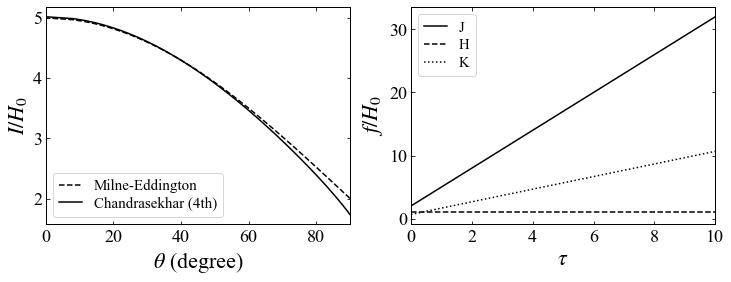

In [2]:
label_size=22
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))
# left panel
ax1.set_xlabel(r'$\theta$ (degree)',fontsize=label_size)
ax1.set_ylabel(r'$I/H_0$',fontsize=label_size)
ax1.set_xlim(0,90)
ax1.plot(np.arccos(x)*180/np.pi,analytic, '--', color='black', label='Milne-Eddington')
ax1.plot(np.arccos(x)*180/np.pi,chandra, '-', color='black', label='Chandrasekhar (4th)')
ax1.legend(fontsize=15)
# right panel
ax2.set_xlabel(r'$\tau$',fontsize=label_size)
ax2.set_ylabel(r'$f/H_0$',fontsize=label_size)
ax2.set_xlim(0,taumax)
ax2.plot(t, j_analytic, 'black', linestyle='-', label='J', markersize=4)
ax2.plot(t, h_analytic, 'black', linestyle='--', label='H', markersize=4)
ax2.plot(t, k_analytic, 'black', linestyle=':', label='K', markersize=4)
ax2.legend(fontsize=15);

As you see in the left panel, the emergent intensity decreases as larger $\theta$ unknown as the ***limb-darkening effect***. You can clearly see the limb-darkening effect when you look at an image of the Sun at a visual wavelength. In the image, you will notice that the limb of the Sun is darker than the center. 


# Numerical solution

Let's reproduce the above panels using Monte Carlo simulations. The Monte Carlo method is originally named after a city in France *Monte Carlo*, famous for a casino. Indeed, the heart of the Monte Carlo method is really like *throwing a dice* or *spinning a roulette* as we see in casino. In the Monte Carlo method, we use (pseudo) random numbers instead of using a dice or a spinning roulette to simulate complex phenomena.

## Introduction to Monte Carlo Simulation

One of the most important features of Monte Carlo simulation is *Monte Carlo Quadrature*, which finds a value of the following integral:
$$
\int_a^b z(x)f(x)dx
$$
If f(x) is normalized such that $\int_a^b f(x)dx=1$, $f(x)$ may be regarded as the probability distribution function (PDF). Hence, this equation can be regarded as the definition of the expected value of $z(x)$ for the given PDF:
$$
\langle z \rangle=\int_a^b z(x)f(x)dx
$$
Meanwhile, if we perform random sampling of this PDF $f(x)$ and obtain $x_i$ ($i=1,...,N)$, we can calculate a value of sample mean $z$:
$$
\bar{z}=\frac{1}{N}\sum_{i=1}^{N}z(x_i)
$$
If the mean value exists and the variance is bounded, then ***the law of large numbers*** ensures
$$
\lim_{N\to\infty}\bar{z}=\langle z \rangle
$$
This is the fundamental idea of a Monte Carlo Quadrature.

Another important theorem relevant to a Monte Carlo Quadrature is ***the central limit theorem***. 
As mentioned above, we expect $\bar{z}=\langle z \rangle$ when $N\to\infty$. However, it is impossible to take $N\to\infty$ in a computer, and therefore, $N$ have to be limited to a finite number. In this case, we may expect that $\bar{z}$ values are distributed around the true mean $\langle z \rangle$ with some standard deviation (if $N$ is sufficiently large). Then a question is what kind of distribution is this?
The central limit theorem answers this question. The theorem states that a sample mean value $\bar{z}$ extracted from a distribution of $\langle z \rangle$ with the standard deviation of $\sigma$ obeys *the normal distribution with the mean value of $\langle z \rangle$ and the standard deviation $\sigma/\sqrt{N}$*. 
Since the variance $\sigma^2$ is usually not known, we approximate it by the sample variance defined by
$$
s^2(z)=\frac{1}{N-1}\sum_{i=1}^N [z(x_i)-\bar{z}]^2
$$
Thus, Monte Carlo estimates of $\langle{z}\rangle$ with the 68\% confidence interval becomes
$$ 
\bar{z}\pm \frac{s(z)}{\sqrt{N}}
$$
This means that we will find a true value of $\langle z\rangle$ within the interval [$\bar{z}-s(z)/\sqrt{N}$,$\bar{z}+s(z)/\sqrt{N}$] with a probability of 68%. If your increase $N$, then the error decreases with $\propto1/\sqrt{N}$ (this is convincing if you look at the error propagation of the sample mean). If you want to reduce the error by a factor of 10, you will need 100 times larger $N$ values.


## Monte Carlo Radiative Transfer Simulation

MCRT is a numerical method to solve radiative transfer equation by using the Monte Carlo Method. In MCRT, we follow a trajectory of a bunch of photons, called a *photon packet*. A photon packet is not necessary to represent a single photon. For example, Sun emits $10^{45}$ photons per second, and tracing all of their trajectories is practically impossible under current computational resources. Instead, we consider $N_0$ photon packets and trace trajectories of each photon packet. If $N_0=10^5$, each photon packet contains about $10^{40}$ *real* photons in the Sun's example above. 

To show how photon packets are related to the radiation quantities, let's suppose a system irradiated by a radiative flux $F$ [erg/cm$^2$/s]. In this case, the amount of energy injected into this system during time $\Delta{t}$ through an area $\Delta{A}$ is
$$
\Delta E = F\Delta{t}\Delta A
$$
Let's divide this energy up $N_0$ photon packets. Thus, each photon packet will carry an energy of
$$
\Delta\epsilon=\Delta E/N_0=F\Delta{t}\Delta A/N_0
$$
If the photon packet is crossing an area $\Delta{A}$ with the angle-cosine $\mu$ toward the solid angle $\Delta\Omega$, the intensity carried by each photon packet is
$$
\Delta I=\frac{\Delta \epsilon}{|\mu|\Delta{t}\Delta{A}\Delta\Omega}
$$

## Write a code of MCRT  

Let's consider a plane-parallel atmosphere with the vertical optical depth $\tau_\mathrm{max}$ (Evidently, a numerical simulation cannot exactly semi-infinite atmosphere). There is ground at the bottom of the atmosphere, which emits radiation with a brightness of $B$. The radiation emitted from the ground propagates through the atmosphere suffering scattering and eventually escaping the atmosphere. Let take the $z$-axis perpendicular to the ground and set $z=0$ and $z=1$ as the bottom and top of the atmosphere, respectively.

### Procedures
Let's suppose that a photon packet is initially located at $(x_0,y_0,z_0)=(0,0,0)$. Next, we determine the photon packet's launching direction $(\mu,\phi)$ by drawing two random variables ($\xi_1,\xi_2$). We assume that the ground is the Lambertian surface; the intensity of the ground is the same regardless of the observer's angle of view. 
Because of this uniform brightness of the ground, you might think that photon emitting probability is the same for all directions (upper hemisphere) and then put $\mu=\xi_1$ and $\phi=2\pi \xi_2$. *However, this is wrong*. The correct probability for the Lambertian surface is $p(\mu)=2\mu$, which is normalized such that $\int_0^1 p(\mu)d\mu=1$. 
The $\mu$ dependence is due to the projection of *the unit area of the ground* to the plane perpendicular to the ray (remember the definition of intensity). Hence, larger angles (smaller $\mu$) have a lower probability of photon emission. 
You may worry if this probability function satisfies the Lambertian surface. 
To demonstrate this, imagine you are looking at the ground through a cylinder from various viewing angles. Then, you will notice that you can see a larger region of the ground as the angle increases. Thus, even if photon emission probability per unit area of the ground surface is lower for larger angles, the inclined observer will see a larger ground surface area. The two competing effects exactly counteract to vanish the angular dependence of intensity. As a consequence, the surface becomes Lambertian.
To sample random variables describing $\mu$ and $\phi$, we draw two random variables ($\xi_1,\xi_2$), and then
$$
\mu = \sqrt{\xi_1},~\phi=2\pi\xi_2
$$

We draw another random variable $\xi$ to determine the travel distance of a photon packet. Since the number of photon decreases as $e^{-\tau}$, the next scattering event happens after it travels 
$$
\tau=-\ln(\xi)
$$
This corresponds to the physical distance of $s=\tau/\tau_\mathrm{max}$ because now $\tau_\mathrm{max}$ corresponds to the physical length of 1.

Now, we know in which a photon packet is lauched and how long distance it travels, we can actually calculate the new location of the photon packet at which scattering happens:
$$
x_1 = x_0 + s\sin\theta\cos\phi,\\
y_1 = y_0 + s\sin\theta\sin\phi,\\
z_1 = z_0 + s\cos\theta
$$

At $(x_1,y_1,z_1)$, the photon packet experiences scattering, and therefore, the direction of the photon packet is changed here. To determine the new direction, we draw new two random variables ($\xi_1,\xi_2$). Since the scattering is assumed to be isotropic, scattering phase function is $\Phi(\mu,\phi)=1/2$, which is normalized such that $\int_{-1}^{1}d\mu\int_0^{2\pi}d\phi \Phi(\mu)=1$. Therefore, the new angles are given by
$$
\mu = 2\xi_1-1,~\phi=2\pi\xi_2,
$$
As we did before, we determine the new travel distance to the next scattering event by drawing a random variable, and then the photon packet is re-launched from $(x_1,y_1,z_1)$. The above steps should be repeated until the photon packet escapes from the atmosphere ($z>1$). If a photon packet hits the ground ($z_1\le0$), this packet is re-launched from the origin. Once a photon packet escaped from the atmosphere, we launch another photon packet from the ground surface and repeat it until $N_0$ photon packets escape from the atmosphere.


### Radiation quantities
To measure the emergent intensity of escaping photons, let's make an angular grid $\mu_i$ with width $\Delta\mu$ and count up the number of photon packets going $\mu_i$. If the number of photon packet entering the $\mu_i$ bin is $N(\mu_i)$, the total intensity is
$$
\frac{I(\mu_i)}{F}=\frac{\Delta{I}N(\mu_i)}{F}=\frac{N(\mu_i)}{\mu_i\Delta\Omega N_0}=\frac{N(\mu_i)}{2\pi\mu_i\Delta\mu N_0},
$$
where we have used axisymmetric assumption ($\Delta\Omega=2\pi\Delta\mu$). If we slightly change the normalization by using radiative flux $F=4\pi H(0)$, the normalized emergnet intensity becomes
$$
\frac{I(\mu_i)}{H(0)}=\frac{2N(\mu_i)}{\mu_i\Delta\mu N_0}
$$
$H(0)$ is determined from a boundary condition. In our case, the ground surface emits radiation with the brightness of $B$, the radiation moment $H$ at the bottom of the atmosphere is
$$
H(0)=\frac{1}{2}\int_0^1 B \mu d\mu = \frac{B}{2}\int_0^1 \mu d\mu = \frac{B}{4},
$$
where we have used $B$ is angle independent (Lambertian surface).

What is the error of the emergent intensity? Since $N(\mu_i)$ obeys Poisson distribution, the $1\sigma$ interval is $\pm\sqrt{N(\mu_i)}$. Since $I(\mu_i)\propto N(\mu_i)$, the intensity with the $1\sigma$ error can be estimated as $I(\mu_i)\pm I(\mu_i)/\sqrt{N(\mu_i)}$. If $N(\mu_i)$ is sufficiently large, say more than 1000, the central limit theorem ensures that the $1\sigma$ interval coincides with the 68\% confidence interval, as the Poisson distribution approaches to the normal distribution.

The radiation moments are estimated by the standard Monte Carlo Quadrature. Let's first divide the vertical optical depth of the atmosphere up $N_z$, then we have grids of cell boundarys of {$\tau_0,\tau_1,...,\tau_{N_z}$} (so we have $Nz+1$ elements). Also, we create arrays of the same size representing radiation moments: $J(\tau_j)$, $H(\tau_j)$, $K(\tau_j)$ ($j=0,1...,N_z$). If a photon packet crosses a cell boundary ($\tau_j$), we add a value to arrays for radiation moments:
$$
\frac{J(\tau_j)}{H(0)} = \frac{1}{N_0}\sum_k \frac{1}{|\mu_k|},~\frac{H(\tau_j)}{H(0)} = \frac{1}{N_0}\sum_k \frac{\mu_k}{|\mu_k|},~\frac{K(\tau_j)}{H(0)} = \frac{1}{N_0}\sum_k \frac{\mu_k^2}{|\mu_k|},
$$
where the index $k$ represents each boundary crossing event.

### A comment on the ground boundary condition

Since if a photon packet hits the ground, it is immediately re-launched upward from the origin. This procedure ensures that the radiation moment $H$ is always constant at the ground (conservation of radiative flux). This can be regarded as the boundary condition imposed in our MCRT simulation. Under the Eddington approximation, we have $3H=dJ/d\tau$. Therefore, the constant $H$ value implies that this boundary condition is the *Neumann boundary condition* rather than the Dirichlet boundary condition (boundary condition for $H$ rather than $J$). Under the Neumann boundary condition, radiation moments are only slightly affected by the presence of the ground. Therefore, radiation moments obtained by the MCRT simulations (at large optical depth, where the Eddington approximation is good enough) is well approximated by the Milne-Eddington solution.

## Compute part of MCRT

Load an external python probram.

In [3]:
import ppscat_rt

Then, set up some parameters for simulation. The vertical optical depth of the atmosphere is specified by `taumax`.

In [4]:
#-------------------------------------
# vertical optical thickness of the atmosphere
#-------------------------------------
taumax = 10.0
#-------------------------------------
# Number of photon packets
#-------------------------------------
Nphoto = 300000
#-------------------------------------
# number of angular grids
#-------------------------------------
Nmu = 50
#-------------------------------------
# number of vertical grids
#-------------------------------------
Nz = 200

tau_c,mu_c,int_mcrt,ierr_mcrt,j_mcrt,h_mcrt,k_mcrt = ppscat_rt.mcrt(Nphoto,taumax,Nmu,Nz)

100%|██████████| 300000/300000 [20:40<00:00, 241.74it/s]


Then, let's compare the simulation results with the analytical estimates.

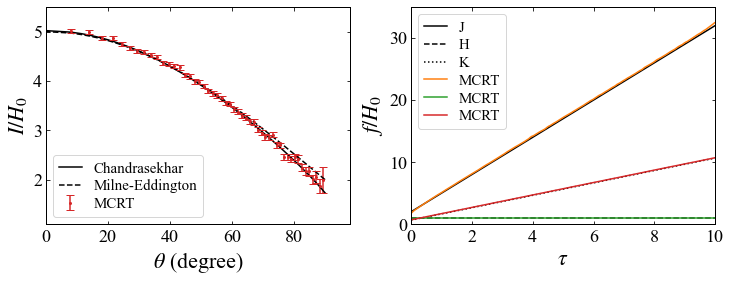

In [5]:
label_size=22
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.set_xlabel(r'$\theta$ (degree)',fontsize=label_size)
ax1.set_ylabel(r'$I/H_0$',fontsize=label_size)
ax1.set_ylim(1.1,5.5)
ax1.set_xlim(0,98)
ax1.plot(np.arccos(x)*180/np.pi,chandra, '-', color='black', label='Chandrasekhar')
ax1.plot(np.arccos(x)*180/np.pi,analytic, '--', color='black', label='Milne-Eddington')
ax1.errorbar(np.arccos(mu_c)*180/np.pi,int_mcrt,yerr=ierr_mcrt, markersize=2,capsize=4,fmt='C3o',label='MCRT')
ax1.legend(fontsize=15,loc=3)

ax2.set_xlabel(r'$\tau$',fontsize=label_size)
ax2.set_ylabel(r'$f/H_0$',fontsize=label_size)
ax2.set_xlim(0,taumax)
ax2.set_ylim(0,35)
ax2.plot(t, j_analytic, 'black', linestyle='-', label='J', markersize=4)
ax2.plot(t, h_analytic, 'black', linestyle='--', label='H', markersize=4)
ax2.plot(t, k_analytic, 'black', linestyle=':', label='K', markersize=4)
ax2.plot(tau_c, j_mcrt, 'C1', linestyle='-', label='MCRT', markersize=4)
ax2.plot(tau_c, h_mcrt, 'C2', linestyle='-', label='MCRT', markersize=4)
ax2.plot(tau_c, k_mcrt, 'C3', linestyle='-', label='MCRT', markersize=4)
ax2.legend(fontsize=15);

In the left panel, you see a good agreement of the simulation results with analytical results. The MCRT results tend to deviate from the ME solutions at large $\theta$ values and seemingly agree with Chandrasekhar's solution. The right panel shows radiation moments as a function of optical depth. The simulated radiation moments slightly deviate from the ME solution at large $\tau$ due to the presence of the ground, but the two results are very similar. Note that, in Appendix below, MCRT results are compared with results obtained by 'non-Monte Carlo' radiative transfer simulations.

To see why the ME solution fails to reproduce the emergent intensity, we plot Eddington factors below.

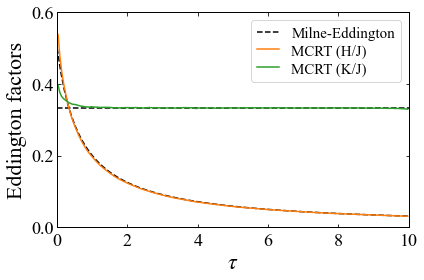

In [6]:
label_size=22
fig, ax = plt.subplots()
ax.set_xlabel(r'$\tau$',fontsize=label_size)
ax.set_ylabel(r'Eddington factors',fontsize=label_size)
ax.set_xlim(0,10)
ax.set_ylim(0,0.6)
ax.plot(t, h_analytic/j_analytic, 'black', linestyle='--', label='Milne-Eddington', markersize=4)
ax.plot(t, k_analytic/j_analytic, 'black', linestyle='--', markersize=4)
ax.plot(tau_c, h_mcrt/j_mcrt, 'C1', linestyle='-', label='MCRT (H/J)', markersize=4)
ax.plot(tau_c, k_mcrt/j_mcrt, 'C2', linestyle='-', label='MCRT (K/J)', markersize=4)
plt.legend(fontsize=15)
plt.tight_layout()

This plot demonstrates that the Eddington approximation breaks down near the top of the atmosphere. This is because radiation field is no longer isotropic in that region.

## Exercises

- If you change the number of photon packets $N_0$, what do you see?
- How many scattering events are typically needed for a photon packet to escape from the atmosphere? How is this related to $\tau_\mathrm{max}$?
- If you switch off scattering at the atmosphere, you will see the emission from the ground directly. Check the ground surface is really a Lambertian surface with the brightness of $B$.

# Appendix

## Comparison with other numerical solution (Variable Eddington Factor Method)

We compare the MCRT results with another numerical solution. Here, we employ the variable Eddington factor (VEF) method. The VEF method employs the following closure relation:
$$
K=fJ,
$$
where $f$ is called the Eddington factor.
In the Eddington approximation, we assume $f=1/3$, but in the VEF method, $f(\tau)$ is a function of $\tau$.
The corresponding radiative diffusion equation is
$$
\frac{d^2(fJ)}{d\tau^2}=J-S
$$
For pure scattering atmosphere, the mean intensity can be expressed as
$$
J=\frac{H_0}{f}(\tau+2f)
$$

The VEF method starts to make an initial guess of $f$, e.g., $f=1/3$ and calculate $J$ values at each optical depth of the atmosphere by solving the radiative diffusion equation (for a pure scattering case, we have an explicit solution). The next step is to calculate the intensity at each $\tau$ by integrating the formal solution of the radiative transfer equation. Then, compute radiation moments at each $\tau$. Now, we can make a new guess of $f(\tau)=K(\tau)/J(\tau)$, and iterate the above prosses until the solution converges. 

Note that, in the $\Lambda$ iteration scheme, which is another famous numerical approach to solve radiative transfer, $J$ is iteratively updated instead of $f$. However, the classical $\Lambda$ iteration scheme is practically not useful owing to slow convergence and/or false convergence for very optically thick cases. A more sophisticated algorithm, such as accelerated $\Lambda$ iteration, Ng acceleration, is usually adopted. An advantage of the VEF method is rapid convergence, even if the optical depth is very large.

What kind of ground boundary condition should we adopt? 
The above MCRT simulations assume constant flux at the ground. Except for the ground emission ($B$), we may need $H^{(+)}=H^{(-)}$ at the ground, where
$$
H^{(+)}(\tau=\tau_\mathrm{max})=\frac{1}{2}\int_{0}^1 I^{(+)}(\tau=\tau_\mathrm{max},\mu>0)\mu d\mu,\\
H^{(-)}(\tau=\tau_\mathrm{max})=\frac{1}{2}\int_{-1}^0 I^{(-)}(\tau=\tau_\mathrm{max},\mu<0)|\mu| d\mu
$$
In the MCRT, the ground emission is always treated as Lambertian, we have $H^{(+)}=I^*/4$, where $I^{(+)}(\tau=\tau_\mathrm{max},\mu>0)=I^*$. 
Therefore, in the following calculation, we impose $I_\mathrm{ground}^{(+)}=B+I^*=B+4H^{(-)}$. 

In [7]:
#-------------------------------------
# vertical optical thickness of the atmosphere
#-------------------------------------
taumax= 10.0
#-------------------------------------
# number of angular grids
#-------------------------------------
Nmu   = 100
#-------------------------------------
# number of vertical grids
#-------------------------------------
Nz    = 1000
tauc_VEF,Jc_VEF,Hc_VEF,Kc_VEF = ppscat_rt.vef(taumax,Nmu,Nz)

0 errmax= 0.005806125416216454
1 errmax= 0.0001048286512697497
2 errmax= 1.9032736649006423e-06
3 errmax= 3.45594192913019e-08
4 errmax= 6.275267200212983e-10


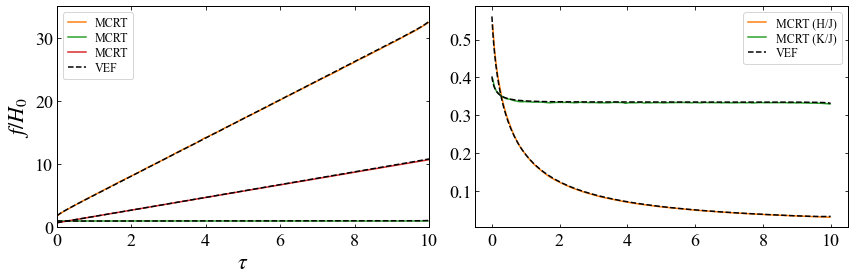

In [8]:
label_size=22
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.set_xlabel(r'$\tau$',fontsize=label_size)
ax1.set_ylabel(r'$f/H_0$',fontsize=label_size)
ax1.set_xlim(0,taumax)
ax1.set_ylim(0,35)
ax1.plot(tau_c, j_mcrt, 'C1', linestyle='-', label='MCRT', markersize=4)
ax1.plot(tau_c, h_mcrt, 'C2', linestyle='-', label='MCRT', markersize=4)
ax1.plot(tau_c, k_mcrt, 'C3', linestyle='-', label='MCRT', markersize=4)
ax1.plot(tauc_VEF, Jc_VEF, 'black', linestyle='--', label='VEF', markersize=4)
ax1.plot(tauc_VEF, Hc_VEF, 'black', linestyle='--', markersize=4)
ax1.plot(tauc_VEF, Kc_VEF, 'black', linestyle='--', markersize=4)

ax2.plot(tau_c, h_mcrt/j_mcrt, 'C1', linestyle='-', label='MCRT (H/J)', markersize=4)
ax2.plot(tau_c, k_mcrt/j_mcrt, 'C2', linestyle='-', label='MCRT (K/J)', markersize=4)
ax2.plot(tauc_VEF, Hc_VEF/Jc_VEF, 'black', linestyle='--', label='VEF', markersize=4)
ax2.plot(tauc_VEF, Kc_VEF/Jc_VEF, 'black', linestyle='--', markersize=4)
ax2.legend(fontsize=12,loc=1)
ax1.legend(fontsize=12,loc=2)
plt.tight_layout()

The results obtained by the VEF method agrees well with those obtained by MCRT.

## Effect of finite optical depth to the ME solution

If we have a ground at $\tau=\tau_\mathrm{max}$ (Fukue 2006, PASJ, 58, 1039). 
In this case, the expression of the upward intensity ($I(\tau,\mu>0)$) is slightly modified, while the rest of radiation quantities remains the same, e.g., radiative moments.
$$
I(\tau,\mu>0)\to B~(\tau\to\tau_\mathrm{max})
$$
This boundary condition yields the upward intensity
$$
I(\tau,\tau_\mathrm{max},\mu>0)=3H_0\left[\tau+\mu+\frac{2}{3}-\left(\tau_\mathrm{max}+\mu+\frac{2}{3}\right)e^{-(\tau_\mathrm{max}-\tau)/\mu}\right]+Be^{-(\tau_\mathrm{max}-\tau)/\mu},
$$
In the limit of $\tau_\mathrm{max}\to\infty$, this solution recovers the ME solution. Therefore, the emergent intensity from the surface of the finite amotsphere is
$$
I(\tau=0,\mu>0)=3H_0\left[\mu+\frac{2}{3}-\left(\tau_\mathrm{max}+\mu+\frac{2}{3}\right)e^{-\tau_\mathrm{max}/\mu}\right]+Be^{-\tau_\mathrm{max}/\mu}.
$$


Vertical optical depth of the atmosphere: 10.0


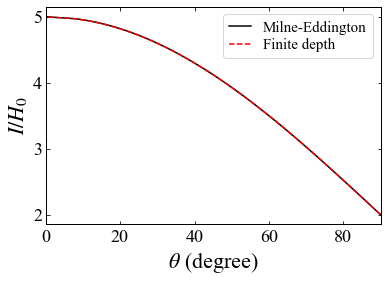

In [9]:
print('Vertical optical depth of the atmosphere:',taumax)
fig, ax = plt.subplots()
analytic_finite = 3.0*(x+2.0/3.0-(taumax+x+2.0/3.0)*np.exp(-taumax/x))+4.0*np.exp(-taumax/x)
label_size=22
ax.set_xlabel(r'$\theta$ (degree)',fontsize=label_size)
ax.set_ylabel(r'$I/H_0$',fontsize=label_size)
ax.set_xlim(0,90)
ax.plot(np.arccos(x)*180/np.pi,analytic, '-', color='black', label='Milne-Eddington')
ax.plot(np.arccos(x)*180/np.pi,analytic_finite, '--', color='r', label='Finite depth')
ax.legend(fontsize=15);